In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


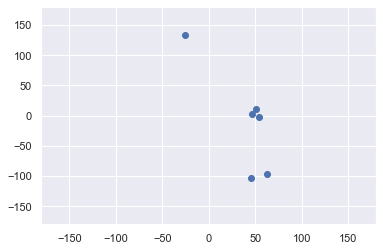

In [4]:
plt.scatter(data['Latitude'], data['Longitude'])
plt.xlim(-180,180)
plt.ylim(-180, 180)
plt.show()

In [5]:
x = data[['Latitude','Longitude']]

In [6]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=2)

In [9]:
identified_clusters = kmeans.fit_predict(x)

In [10]:
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [11]:
data_with_clusters = data.copy()

In [12]:
data_with_clusters['CLuster'] = identified_clusters

In [13]:
data_with_clusters

,Country,Latitude,Longitude,Language,CLuster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


(-180, 180)

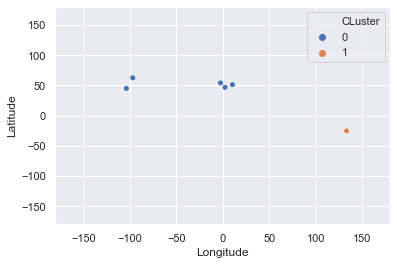

In [14]:

sns.scatterplot(data_with_clusters['Longitude'], data_with_clusters['Latitude'], 
                hue=data_with_clusters['CLuster'])
plt.xlim(-180,180)
plt.ylim(-180, 180)

In [15]:
kmeans.cluster_centers_

array([[ 51.856, -38.06 ],
       [-25.45 , 133.11 ]])

In [16]:
kmeans3 = KMeans(n_clusters=3)

In [17]:
identified_clusters3 = kmeans3.fit_predict(x)

In [18]:
identified_clusters3

array([2, 2, 1, 1, 1, 0])

In [19]:
data_with_clusters3 = data.copy()
data_with_clusters3['CLuster'] = identified_clusters3
data_with_clusters3

,Country,Latitude,Longitude,Language,CLuster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


(-180, 180)

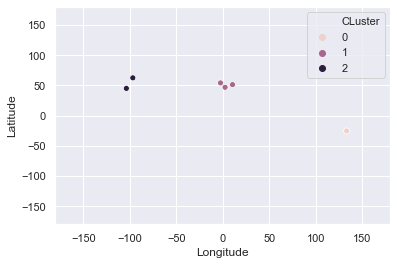

In [20]:
sns.scatterplot(data_with_clusters3['Longitude'], data_with_clusters3['Latitude'], 
                hue=data_with_clusters3['CLuster'])
plt.xlim(-180,180)
plt.ylim(-180, 180)

In [21]:
kmeans3.cluster_centers_

array([[ -25.45      ,  133.11      ],
       [  50.63666667,    3.42333333],
       [  53.685     , -100.285     ]])

In [25]:
data_mapped = data.copy()

In [26]:
x1 = data_mapped['Language'].map({'English':0, 'French':1,'German':2})

In [27]:
x1

0    0
1    0
2    1
3    0
4    2
5    0
Name: Language, dtype: int64

In [28]:
kmeans4 = KMeans(2)

In [29]:
x5 = data[['Latitude','Longitude']]

In [30]:
x5 = pd.concat([x5, data_mapped['Language'].map({'English':0, 'French':1,'German':2})], 
               axis=1)

In [31]:
x5

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [32]:
kmeans5 = KMeans(3)
identified_clusters5 = kmeans5.fit_predict(x5)

In [33]:
data_with_clusters5 = data_mapped.copy()
data_with_clusters5['Cluster'] = identified_clusters5
data_with_clusters5

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


In [34]:
kmeans5.inertia_

290.10523333333333

In [35]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [36]:
wcss=[]
for i in range(1,7):
    kmeans6 = KMeans(i)
    kmeans6.fit(x)
    wcss_temp = kmeans6.inertia_
    wcss.append(wcss_temp)

In [37]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

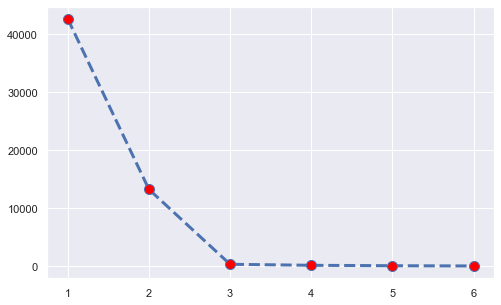

In [38]:
plt.figure(figsize=(8,5))
plt.plot(range(1,7), wcss, linestyle='--', marker='o', markerfacecolor='red',
        linewidth=3, markersize=10)

In [39]:
raw_data = pd.read_csv('Categorical.csv')

In [41]:
raw_data.describe(include='all')

,name,Longitude,Latitude,continent
count,241,241.000000,241.000000,241
unique,241,NaN,NaN,8
top,Kyrgyzstan,NaN,NaN,Africa
freq,1,NaN,NaN,54
mean,NaN,14.215380,17.169377,NaN
std,NaN,72.013654,26.554014,NaN
min,NaN,-177.348348,-80.508579,NaN
25%,NaN,-36.433184,1.358761,NaN
50%,NaN,18.644925,17.277500,NaN
75%,NaN,47.587005,39.115541,NaN


In [47]:
data_mapped = raw_data.copy()
data_mapped.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [48]:
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1


In [49]:
x = data_mapped[['Longitude','Latitude','continent']]

In [50]:
x.head()

,Longitude,Latitude,continent
0,-69.982677,12.520880,0
1,66.004734,33.835231,2
2,17.537368,-12.293361,3
3,-63.064989,18.223959,0
4,20.049834,41.142450,1


In [ ]:
kmeans = KMeans(4)

In [51]:
data = pd.read_csv('3.12. Example.csv')

In [53]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


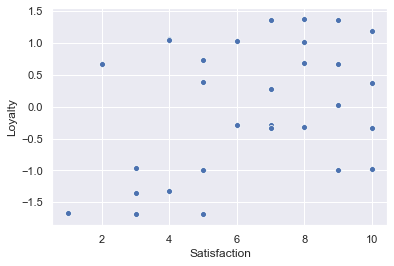

In [57]:
sns.scatterplot(data=data, x = 'Satisfaction',y='Loyalty');

In [58]:
from sklearn.cluster import KMeans

In [62]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [63]:
wcss

[229.16347000000002,
 74.51511402714932,
 50.13624491341991,
 35.52453035714285,
 26.861604166666666,
 21.459241904761903,
 18.01035357142857,
 14.601968333333334,
 11.110593333333332]

Text(0, 0.5, 'WCSS')

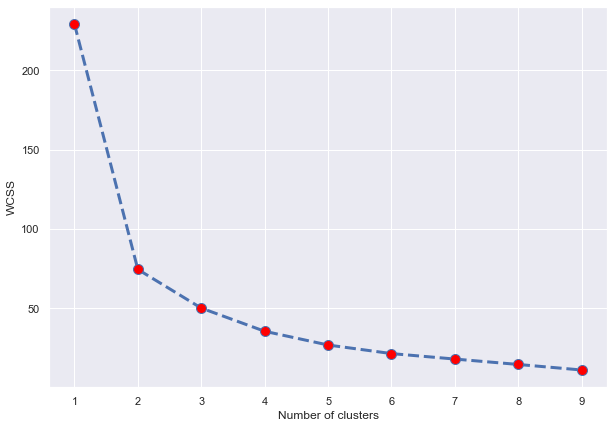

In [64]:
# Plot the number of clusters vs WCSS
plt.figure(figsize=(10,7))
plt.plot(range(1,10),wcss, linestyle='--', linewidth=3, marker='o',markerfacecolor='red',ms=10)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [65]:
kmeans_new = KMeans(4)
kmeans_new.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
cluster_new = data.copy()

In [68]:
cluster_new['cluster_pred'] = kmeans_new.fit_predict(data)

In [74]:
cluster_new.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1


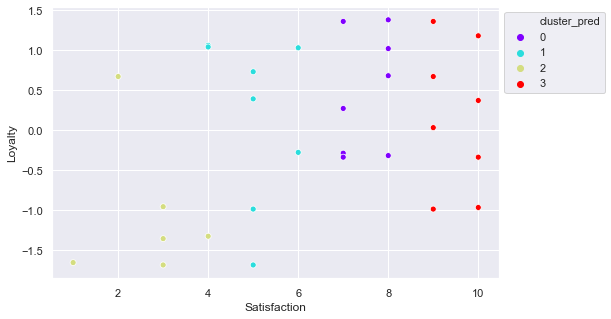

In [82]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=cluster_new, x='Satisfaction',y='Loyalty', 
                hue='cluster_pred', palette='rainbow')
plt.legend(bbox_to_anchor=(1,1))

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
sc = StandardScaler()

In [85]:
x_scaled = sc.fit_transform(data)

In [87]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
cluster_new = data.copy()

In [89]:
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

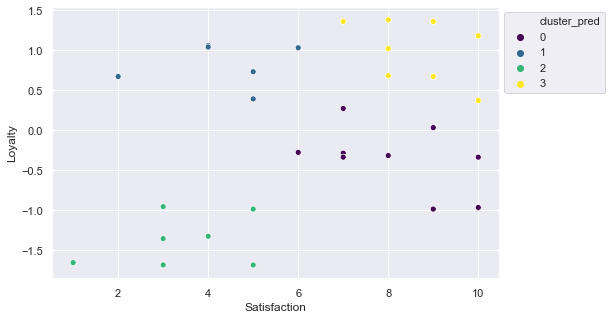

In [92]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=cluster_new, x='Satisfaction',y='Loyalty', 
                hue='cluster_pred', palette='viridis')
plt.legend(bbox_to_anchor=(1,1))